In [46]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [47]:
fmnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fmnist.load_data()

9
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   5   0   0  70  71  84  81  73  38   7   0   0  27  36  39   4   0   1]
 [  0   0   0   0   0   0   0   0   0   0   4   0  44 223 180 209 200 183 165 183 148 175 207 183 193 115   0   4]
 [  0   0   0   0   0   0   0   0   0   0   4   0  72 177 169 180 183 180 186 203 193 190 175 171 179 147   0   0]
 [  0   0   0   0   0   0   0   0   0   0   6   0 109 174 169 175 176 179 170 187 192 201 195 184 181 176   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   0 170 177 172 177 181 175 185 192 188 175 180 181 183 179   0   0]
 [  0   0   0   0   0   0   0   0   0   3   0   9 189 170 172 177 182

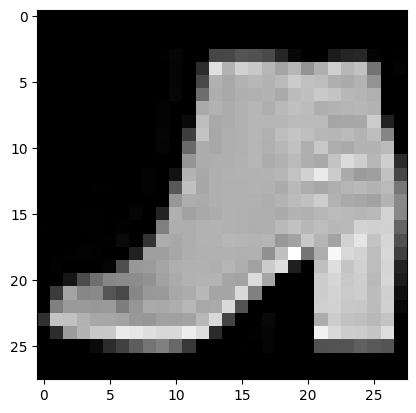

In [48]:
index = 4560
np.set_printoptions(linewidth=320)
print(y_train[index])
print(x_train[index].shape)
print(x_train[index])
plt.imshow(x_train[index], cmap='gray')

In [49]:
# Normalization
# Scale the images to the [0, 1] range
x_train = x_train / 255.0
x_test = x_test / 255.0

# Model Train

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')])

In [51]:
input = np.array([[1.0, 3.0, 4.0, 2.0]])
input = tf.convert_to_tensor(input, dtype=tf.float32)

output = tf.keras.activations.softmax(input)
print(output)

sum = tf.reduce_sum(input)
print(sum)

predictions = np.argmax(output)
print(f"Class with higher prediction: {predictions}")

tf.Tensor([[0.0320586  0.23688284 0.6439142  0.08714432]], shape=(1, 4), dtype=float32)
tf.Tensor(10.0, shape=(), dtype=float32)
Class with higher prediction: 2


In [53]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.Adam(),  # ✅ Correct way to access Adam optimizer
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']                   # ✅ It's 'metrics', not 'matrix'
)

model.fit(x_train, y_train, epochs=5)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7806 - loss: 0.6308
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8619 - loss: 0.3825
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8785 - loss: 0.3347
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8856 - loss: 0.3069
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8922 - loss: 0.2956
313/313 - 1s - 2ms/step - accuracy: 0.8696 - loss: 0.3629

Test accuracy: 0.8695999979972839


In [54]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.8696 - loss: 0.3629


[0.36294010281562805, 0.8695999979972839]